<a href="https://colab.research.google.com/github/viniciusgcjr/Bootcamp-Analista-de-Machine-Learning/blob/master/Relat%C3%B3rio_CRH_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório da disciplina de Clima e RH

# Base de dados

## ERA5

Primeiramente instalamos a interface de programaçao de aplicativos (API) do Climate Data Store.  

O manual da API pode ser visitado em: https://cds.climate.copernicus.eu/api-how-to

In [1]:
!pip install cdsapi

Após o cadastro na plataforma cada usuário recebe uma ID e chave para utilizar a API.  

In [2]:
#importar getpass para solicitar a chave do usuário
import getpass

In [3]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'

#UID_KEY = getpass.getpass()
#key = 'key: ' + UID_KEY

key = 'key: 8944:a26b60a7-40d7-461c-a10c-97426074abbf'


Para se utilizar a api se faz necessário criar um arquivo com as credenciais acima e guardalas no diretório root do computador. Como o google colab roda em um computador linux, criei este arquivo da seguinte maneira:

In [4]:
with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

Importa-se então a api e deve-se executa-la para testar seu funcionamento.

In [5]:
import cdsapi
cdsapi.Client()

Os dados serão persistidos no google drive. A montagem desta nuvem no ambiente colab é feita da seguinte maneira:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Requisição de dados

Colocar imagem do site com o botão da requisão da API!!!!!

A biblioteca xarray será utilizada uma vez que ela já integra as bibliotecas pandas e netcdf4, além de potencializar as operações que seriam possíveis no numpy.

In [7]:
import xarray as xr #biblioteca para processar os dados 
from urllib.request import urlopen 

#leitura do dataset 
c = cdsapi.Client()

# flag para o download data
download_flag = False

dataset = 'reanalysis-era5-single-levels-monthly-means'

# parametros da api 
params = {
    'format': 'netcdf',
    'variable': ['total_precipitation', '2m_temperature'],
    'product_type': 'monthly_averaged_reanalysis',
    'expver': '1',
    'year': [
            '1981', '1982', '1983','1984', '1985', '1986','1987', '1988', '1989',
            '1990', '1991', '1992','1993', '1994', '1995','1996', '1997', '1998',
            '1999', '2000', '2001','2002', '2003', '2004','2005', '2006', '2007',
            '2008', '2009', '2010','2011', '2012', '2013','2014', '2015', '2016',
            '2017', '2018', '2019','2020'],
    'month':['01', '02', '03', '04', '05', '06', '07', '08', '09','10', '11', '12'],
    'time': '00:00',
    'area': [-7.15, -41.5, -9.6, -35],
    }

#Escolha de diretório no google drive
PernambucoERA5 = './drive/MyDrive/CRH/PernambucoERA5.nc'

#Arquivo gerado pelos paramêtros especificados
fl = c.retrieve(dataset, params)

#Caso a flag esteja como True o download do arquivo em netcdf será realizado e 
#persistido no diretório especificado no google drive
if download_flag:
  fl.download(PernambucoERA5)

#leitura dos dados 
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())
    print(ds)

2021-07-16 18:19:41,939 INFO Welcome to the CDS
2021-07-16 18:19:41,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2021-07-16 18:19:42,126 INFO Request is completed


<xarray.Dataset>
Dimensions:    (latitude: 10, longitude: 27, time: 480)
Coordinates:
  * longitude  (longitude) float32 -41.5 -41.25 -41.0 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -7.35 -7.6 -7.85 -8.1 ... -9.1 -9.35 -9.6
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-13 22:36:50 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...


Variáveis recuperadas  


    tp         = total precipitation  
    t2m        = temperatura do ar (2m) 

##### Mapa de temperatura do ar (2m) em 01/12/2020

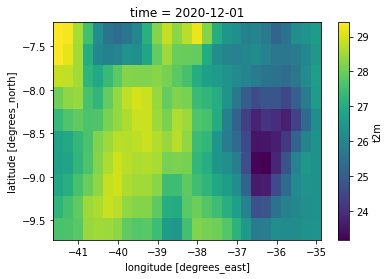

In [8]:
temperatura = ds.t2m - 273.15 #convertendo de k para ºC
temperatura[479].plot()

#### Dataframe

A biblioteca pandas será utilizada para manipulação dos dados, sendo uma biblioteca elegante e poderosa para este fim. 

In [9]:
#Transformação dos dados em dataframe
df = ds.to_dataframe()

#Conversão de m para mm
df.loc[:,'tp'] = df.loc[:,'tp']*1000

#Conversão de K para ºC
df.loc[:,'t2m'] = df.loc[:,'t2m'] - 273.15

df

2021-07-16 18:19:44,181 INFO NumExpr defaulting to 2 threads.


tp        t2m
latitude longitude time                            
-7.35    -41.5     1981-01-01   4.351404  26.504205
                   1981-02-01   0.993128  28.256006
                   1981-03-01  10.961049  27.177423
                   1981-04-01   1.676493  26.214044
                   1981-05-01   0.006800  27.354944
...                                  ...        ...
-9.60    -35.0     2020-08-01   1.073591  25.054163
                   2020-09-01   1.157453  25.116876
                   2020-10-01   0.602148  25.923242
                   2020-11-01   1.075857  26.252618
                   2020-12-01   1.106078  26.365930

[129600 rows x 2 columns]

##### Descrição básica dos dados

In [10]:
df.describe()

,tp,t2m
count,129600.000000,129600.000000
mean,1.658527,25.697175
std,2.050772,1.983663
min,0.000000,19.296411
25%,0.287475,24.311792
50%,0.930420,25.708582
75%,2.249176,27.066003
max,24.755669,32.821436


#### Ponto mais próximo ao posto meteorológico

É necessário criar uma função para determinar qual o ponto de grade no arquivo netcdf que mais se aproxima da estação meteorológica que será utilizada.

In [16]:
import numpy as np

def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx


Visualização do array de latitude e longitude do ERA5 

In [12]:
print(ds.variables['latitude'][:])
print(ds.variables['longitude'][:])

<xarray.IndexVariable 'latitude' (latitude: 10)>
array([-7.35, -7.6 , -7.85, -8.1 , -8.35, -8.6 , -8.85, -9.1 , -9.35, -9.6 ],
      dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.IndexVariable 'longitude' (longitude: 27)>
array([-41.5 , -41.25, -41.  , -40.75, -40.5 , -40.25, -40.  , -39.75, -39.5 ,
       -39.25, -39.  , -38.75, -38.5 , -38.25, -38.  , -37.75, -37.5 , -37.25,
       -37.  , -36.75, -36.5 , -36.25, -36.  , -35.75, -35.5 , -35.25, -35.  ],
      dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude


A estação escolhida para a comparação está localizada em Petrolina e pertece ao Instituto Nacional de Meteorologia (INMET).

As informações da estação podem ser visualizadas no site: https://mapas.inmet.gov.br/

In [17]:
#Estação 82983
inmet_lat = -9.39, 
inmet_lon = -40.52

In [14]:
lats_ERA5 = ds.variables['latitude'][:]
lons_ERA5 = ds.variables['longitude'][:]

lat_idx = geo_idx(inmet_lat, lats_ERA5)
lon_idx = geo_idx(inmet_lon, lons_ERA5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  # Remove the CWD from sys.path while we load stuff.


Índices do array que correspondem o ponto da estação

In [15]:
print(lat_idx.values)
print(lon_idx.values)

8
4


#### Série de precipitação 

Série de precipitação para o ponto de grade que compreende a estação do INMET 

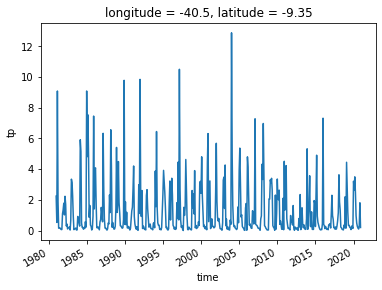

In [16]:
tp = ds.tp * 1000
tp.isel(latitude=8, longitude=4).plot()

#### Tabela filtrada 

Como os dados do era são do tipo float, não é possível comparar diretamente o 
valor de latitude e longitude, logo utiliza-se um delta para a query que 
retornará os dados do ponto de grade mais próximos das coordenadas da estação que foram passadas acima.

O delta escolhido foi de 0.1, visto que a grade tem espacamento de 0,25.

In [17]:
delta = 0.1
latitude1 = str(lats_ERA5[lat_idx].values + delta )
latitude2 = str(lats_ERA5[lat_idx].values - delta)
longitude1 = str(lons_ERA5[lon_idx].values + delta)
longitude2 = str(lons_ERA5[lon_idx].values - delta)

tabelaEra5 = (df.query('latitude < ' + latitude1 + ' and latitude > ' + latitude2 + ' and longitude < ' + longitude1 + ' and longitude > ' + longitude2))
tabelaEra5

tp        t2m
latitude longitude time                           
-9.35    -40.5     1981-01-01  2.243132  26.472437
                   1981-02-01  0.528485  27.565454
                   1981-03-01  9.087366  25.965326
                   1981-04-01  1.852529  24.651483
                   1981-05-01  0.150726  24.467798
...                                 ...        ...
                   2020-08-01  0.163947  24.956934
                   2020-09-01  0.100862  26.793573
                   2020-10-01  0.338850  29.294122
                   2020-11-01  1.808710  27.216028
                   2020-12-01  0.200968  28.621088

[480 rows x 2 columns]

In [18]:
dftabela=tabelaEra5.reset_index()
dftabela=dftabela.drop(['latitude'],axis=1)
dftabela=dftabela.drop(['longitude'],axis=1)
#dftabela.set_index('time', inplace=True)
dftabela

,time,tp,t2m
0,1981-01-01,2.243132,26.472437
1,1981-02-01,0.528485,27.565454
2,1981-03-01,9.087366,25.965326
3,1981-04-01,1.852529,24.651483
4,1981-05-01,0.150726,24.467798
...,...,...,...
475,2020-08-01,0.163947,24.956934
476,2020-09-01,0.100862,26.793573
477,2020-10-01,0.338850,29.294122
478,2020-11-01,1.808710,27.216028


## API INMET  

O manual da API pode ser encontrado em: https://portal.inmet.gov.br/manual

In [19]:
import requests
import pandas as pd

Código da estação e geocode de Petrolina: 82983; 2611101.

In [20]:
response_inmet = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/1981-01-01/2020-12-31/82983').json()

In [21]:
df_projeta = pd.DataFrame.from_dict(response_inmet)
df_projeta['DT_MEDICAO'] =  pd.to_datetime(df_projeta['DT_MEDICAO'], format='%Y-%m-%d')
df_projeta.set_index('DT_MEDICAO', inplace=True)
df_projeta.head()

,TEMP_MAX,UMID_MED,UF,DC_NOME,TEMP_MED,CHUVA,INSOLACAO,CD_ESTACAO,VL_LATITUDE,VL_LONGITUDE,TEMP_MIN
DT_MEDICAO,,,,,,,,,,,
1981-01-01,29.6,74.75,PE,PETROLINA,25.44,16.4,0.7,82983,-9.3886111,-40.52333332,22.2
1981-01-02,32.1,57.5,PE,PETROLINA,27.5,0,4.6,82983,-9.3886111,-40.52333332,23.4
1981-01-03,31.5,58.5,PE,PETROLINA,26.74,4.6,5.5,82983,-9.3886111,-40.52333332,22
1981-01-04,32.3,46.75,PE,PETROLINA,27.1,0,8.6,82983,-9.3886111,-40.52333332,22.4
1981-01-05,31.7,55.25,PE,PETROLINA,26.5,0,11.1,82983,-9.3886111,-40.52333332,21.4


In [22]:
df_projeta["TEMP_MED"] = pd.to_numeric(df_projeta["TEMP_MED"], downcast="float")
df_projeta["CHUVA"] = pd.to_numeric(df_projeta["CHUVA"], downcast="float")
tab = df_projeta[['TEMP_MED', 'CHUVA']]
tab

,TEMP_MED,CHUVA
DT_MEDICAO,,
1981-01-01,25.440001,16.4
1981-01-02,27.500000,0.0
1981-01-03,26.740000,4.6
1981-01-04,27.100000,0.0
1981-01-05,26.500000,0.0
...,...,...
2020-12-27,27.820000,0.0
2020-12-28,28.740000,0.0
2020-12-29,28.360001,0.0


In [23]:
tab = tab.groupby(pd.Grouper(freq='1M', origin='start')).mean()
tab = tab.reset_index()
#df_projeta_media_mensal = tab.groupby(by=[tab.index.year, tab.index.month]).mean() # Se preferir com datas em multinível
#df_projeta_media_mensal.reset_index(inplace = True)
tab

,DT_MEDICAO,TEMP_MED,CHUVA
0,1981-01-31,27.090588,1.155882
1,1981-02-28,27.842142,0.542857
2,1981-03-31,26.272121,8.690625
3,1981-04-30,24.904516,3.138710
4,1981-05-31,24.494545,0.000000
...,...,...,...
475,2020-08-31,25.010714,0.141935
476,2020-09-30,26.930666,0.020000
477,2020-10-31,29.584139,0.067742
478,2020-11-30,27.251034,5.436666


In [74]:
result = pd.concat([tab[0:479], dftabela], axis=1).reindex(tab[0:479].index)
result

,DT_MEDICAO,TEMP_MED,CHUVA,time,tp,t2m
0,1981-01-31,27.090588,1.155882,1981-01-01,2.243132,26.472437
1,1981-02-28,27.842142,0.542857,1981-02-01,0.528485,27.565454
2,1981-03-31,26.272121,8.690625,1981-03-01,9.087366,25.965326
3,1981-04-30,24.904516,3.138710,1981-04-01,1.852529,24.651483
4,1981-05-31,24.494545,0.000000,1981-05-01,0.150726,24.467798
...,...,...,...,...,...,...
474,2020-07-31,24.544138,0.158065,2020-07-01,0.266320,24.435205
475,2020-08-31,25.010714,0.141935,2020-08-01,0.163947,24.956934
476,2020-09-30,26.930666,0.020000,2020-09-01,0.100862,26.793573
477,2020-10-31,29.584139,0.067742,2020-10-01,0.338850,29.294122


In [75]:
result['DT_MEDICAO'] =  pd.to_datetime(result['DT_MEDICAO']).dt.strftime("%Y-%m")
result['time'] =  pd.to_datetime(result['time']).dt.strftime("%Y-%m")
result.set_index('time', inplace=True)
result["CHUVA"] = pd.to_numeric(result["CHUVA"], downcast="float")
result["tp"] = pd.to_numeric(result["tp"], downcast="float")


result

,DT_MEDICAO,TEMP_MED,CHUVA,tp,t2m
time,,,,,
1981-01,1981-01,27.090588,1.155882,2.243132,26.472437
1981-02,1981-02,27.842142,0.542857,0.528485,27.565454
1981-03,1981-03,26.272121,8.690625,9.087366,25.965326
1981-04,1981-04,24.904516,3.138710,1.852529,24.651483
1981-05,1981-05,24.494545,0.000000,0.150726,24.467798
...,...,...,...,...,...
2020-07,2020-07,24.544138,0.158065,0.266320,24.435205
2020-08,2020-08,25.010714,0.141935,0.163947,24.956934
2020-09,2020-09,26.930666,0.020000,0.100862,26.793573


In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 1981-01 to 2020-11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DT_MEDICAO  479 non-null    object 
 1   TEMP_MED    448 non-null    float32
 2   CHUVA       462 non-null    float32
 3   tp          479 non-null    float32
 4   t2m         479 non-null    float64
dtypes: float32(3), float64(1), object(1)
memory usage: 16.8+ KB


In [76]:
result = result.dropna()
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 1981-01 to 2020-11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DT_MEDICAO  448 non-null    object 
 1   TEMP_MED    448 non-null    float32
 2   CHUVA       448 non-null    float32
 3   tp          448 non-null    float32
 4   t2m         448 non-null    float64
dtypes: float32(3), float64(1), object(1)
memory usage: 15.8+ KB


In [28]:
result.to_csv('tabelacompleta.csv')

##### RMSE

In [29]:
from sklearn.metrics import mean_squared_error


rmse = mean_squared_error(result['CHUVA'], result['tp'], squared=False)
rmse





1.1278179

In [30]:
from sklearn.metrics import r2_score #método para o cálculo do R2

R_2 = r2_score(result['CHUVA'], result['tp'])  #realiza o cálculo do R2
R_2

0.7183416603203112

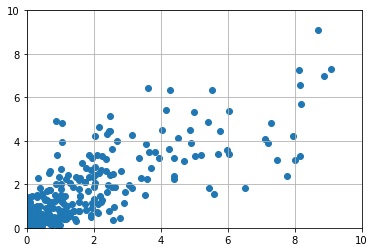

In [31]:
from matplotlib import pyplot as plt
plt.scatter(result['CHUVA'], result['tp'])
plt.xlim(0, 10)
plt.ylim(0,10)
plt.grid()

In [32]:
df.query('latitude < ' + latitude1 + ' and latitude > ' + latitude2 + ' and longitude < ' + longitude1 + ' and longitude > ' + longitude2).to_csv('teste.csv')

## Teste de Hipótese


In [34]:
from scipy.stats import mannwhitneyu
import statsmodels as sm

In [35]:
def testeMW(sample1, sample2):
  
  statMann, pMann = mannwhitneyu(sample1, sample2)
  hipotese(pMann)

def testeWaldwolf(sample1,sample2):
  statWald, pWald = sm.sandbox.stats.runs.runstest_2samp(sample1, sample2)
  hipotese(pWald)



def hipotese(p):  
  print(f'p-valor: {p:.3f}')
  alpha = 0.05
  if p > alpha:
	  print('Mesma distribuição (falha ao rejeitar H0)')
  else:
	  print('Distribution diferente (H0 rejeitado)')



In [36]:
indiceMetadeSerie = int((len(result['tp'])/2)) # divide  a série pela metade
amostra1 = result['tp'][0:indiceMetadeSerie]    #amostra com a metade inicial
amostra2 = result['tp'][indiceMetadeSerie:len(result['tp'])] #amostra com a metade final

In [48]:
testeMW(amostra1, amostra2)

p-valor: 0.134
Mesma distribuição (falha ao rejeitar H0)


In [49]:
testeWaldwolf(amostra1, amostra2)

ties detected
p-valor: 0.508
Mesma distribuição (falha ao rejeitar H0)


In [50]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(amostra1, amostra2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.000, p=1.000
Probably independent


In [52]:
from scipy import stats

stats.spearmanr(amostra1, amostra2)

SpearmanrResult(correlation=-0.22536053393307934, pvalue=0.0006792201746687402)

In [41]:
from statsmodels.sandbox.stats.runs import runstest_1samp 

#create dataset
data = [12, 16, 16, 15, 14, 18, 19, 21, 13, 13]

#Perform Runs test
runstest_1samp(data, correction=False)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-0.6708203932499369, 0.5023349543605021)

In [42]:
from statsmodels.sandbox.stats.runs import runstest_2samp 
runstest_2samp(amostra1, amostra2)

ties detected


(-0.6621789348084367, 0.5078565527775274)

In [55]:
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(result['tp'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-4.153, p=0.001
Probably Stationary


### Tendência

In [56]:
!pip install pymannkendall

In [57]:
import pymannkendall as mk

mk.original_test(result['tp'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.3776846609883018, z=-0.8821704097508879, Tau=-0.02790428251837648, s=-2794.0, var_s=10023904.0, slope=-0.00011646813098118873, intercept=0.4124782655475348)

In [85]:
mk.seasonal_test(result['tp'], period=12)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=0.7095286420954214, z=-0.37248921275219454, Tau=-0.012407862407862407, s=-101.0, var_s=72073.0, slope=-0.00045336782932281494, intercept=0.39489161409437656)

In [86]:
mk.seasonal_test(result['t2m'], period=12)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=3.906164280920166e-10, z=6.257731949926266, Tau=0.2065110565110565, s=1681.0, var_s=72075.0, slope=0.037054443359375, intercept=26.45408096313479)

In [60]:
mk.sens_slope(result['tp'])

Sens_Slope_Test(slope=-0.00011646813098118873, intercept=0.4124782655475348)

In [58]:
import scipy.stats as stats
tau, p_value = stats.kendalltau(amostra1, amostra2)
print(tau)

p_value

-0.14252818351339963


0.0015022580705378798

In [61]:
!pip install pyhomogeneity

In [77]:
import pyhomogeneity as hg


resultado = hg.pettitt_test(result['tp'])
print(resultado)

Pettitt_Test(h=False, cp=334, p=0.24605, U=5485.0, avg=mean(mu1=1.316371, mu2=0.8416668))


And all Homogeneity tests return a named tuple which contained:

    h: True (if data is nonhomogeneous) or False (if data is homogeneous)
    cp: probable change point location
    p: p value of the significance test
    U/T/Q/R/V: test statistics which depends on the test method
    avg: mean values at before and after the change point


In [80]:
result.iloc[334]

DT_MEDICAO     2011-06
TEMP_MED        25.364
CHUVA                0
tp            0.140904
t2m            25.3454
Name: 2011-06, dtype: object

## Índices de Seca

In [14]:
import xarray as xr #biblioteca para processar os dados 
from urllib.request import urlopen 

# flag para o download data
download_flag = True

c2 = cdsapi.Client()

fl2 = c2.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'relative_humidity',
        'pressure_level': '1000',
        'year': [
            '1981', '1982', '1983',
            '1984', '1985', '1986',
            '1987', '1988', '1989',
            '1990', '1991', '1992',
            '1993', '1994', '1995',
            '1996', '1997', '1998',
            '1999', '2000', '2001',
            '2002', '2003', '2004',
            '2005', '2006', '2007',
            '2008', '2009', '2010',
            '2011', '2012', '2013',
            '2014', '2015', '2016',
            '2017', '2018', '2019',
            '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            -7.5, -41.5, -9.6,
            -9.6,
        ],
    },
    'download.nc')


#Escolha de diretório no google drive
PernambucoERA5UR = './drive/MyDrive/CRH/PernambucoERA5UR.nc'

#Caso a flag esteja como True o download do arquivo em netcdf será realizado e 
#persistido no diretório especificado no google drive
if download_flag:
  fl2.download(PernambucoERA5UR)

#leitura dos dados 
with urlopen(fl2.location) as f2:
    ds2 = xr.open_dataset(f2.read())
    print(ds2)

2021-07-17 00:09:52,853 INFO Welcome to the CDS
2021-07-17 00:09:52,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2021-07-17 00:09:53,021 INFO Request is completed
2021-07-17 00:09:53,023 INFO Downloading https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data0/adaptor.mars.internal-1626480151.5846174-20858-17-fb5823ac-91a8-4fd3-b50d-1690362be16e.nc to download.nc (1.1M)
2021-07-17 00:09:54,865 INFO Download rate 589.2K/s
2021-07-17 00:09:55,013 INFO Downloading https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data0/adaptor.mars.internal-1626480151.5846174-20858-17-fb5823ac-91a8-4fd3-b50d-1690362be16e.nc to ./drive/MyDrive/CRH/PernambucoERA5UR.nc (1.1M)
2021-07-17 00:09:55,305 INFO Download rate 3.6M/s


<xarray.Dataset>
Dimensions:    (latitude: 9, longitude: 128, time: 480)
Coordinates:
  * longitude  (longitude) float32 -41.5 -41.25 -41.0 ... -10.25 -10.0 -9.75
  * latitude   (latitude) float32 -7.6 -7.85 -8.1 -8.35 ... -9.1 -9.35 -9.6
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-17 00:02:32 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...


In [15]:
#Transformação dos dados em dataframe
df2 = ds2.to_dataframe()

df2

r
latitude longitude time                 
-7.6     -41.50    1981-01-01  72.435432
                   1981-02-01  54.483418
                   1981-03-01  71.493050
                   1981-04-01  69.638603
                   1981-05-01  55.008308
...                                  ...
-9.6     -9.75     2020-08-01  72.422440
                   2020-09-01  76.667488
                   2020-10-01  76.863235
                   2020-11-01  77.601204
                   2020-12-01  78.064598

[552960 rows x 1 columns]

In [34]:
df2.to_csv('umidadeERA5.txt')

In [18]:
lats_ERA5UR = ds2.variables['latitude'][:]
lons_ERA5UR = ds2.variables['longitude'][:]

lat_idxUR = geo_idx(inmet_lat, lats_ERA5UR)
lon_idxUR = geo_idx(inmet_lon, lons_ERA5UR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  # Remove the CWD from sys.path while we load stuff.


In [20]:
print(lat_idxUR.values)
print(lon_idxUR.values)

7
4


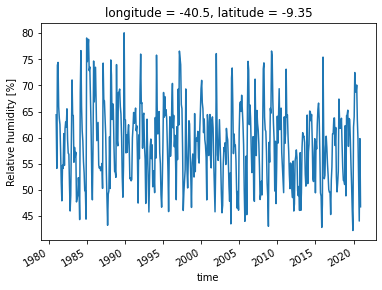

In [24]:
ds2.r.isel(latitude=lat_idxUR.values, longitude=lon_idxUR.values).plot()

In [25]:
!pip install rpy2

In [26]:
%load_ext rpy2.ipython

In [28]:
%%R

install.packages('SCI')



2021-07-17 00:52:36,311 WARNING R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

2021-07-17 00:52:37,044 WARNING R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/SCI_1.0-2.tar.gz'

2021-07-17 00:52:37,190 WARNING R[write to console]: Content type 'application/x-gzip'
2021-07-17 00:52:37,192 WARNING R[write to console]:  length 12887 bytes (12 KB)

2021-07-17 00:52:37,194 WARNING R[write to console]: =
2021-07-17 00:52:37,197 WARNING R[write to console]: =
2021-07-17 00:52:37,199 WARNING R[write to console]: =
2021-07-17 00:52:37,201 WARNING R[write to console]: =
2021-07-17 00:52:37,203 WARNING R[write to console]: =
2021-07-17 00:52:37,204 WARNING R[write to console]: =
2021-07-17 00:52:37,205 WARNING R[write to console]: =
2021-07-17 00:52:37,207 WARNING R[write to console]: =
2021-07-17 00:52:37,208 WARNING R[write to console]: =
2021-07-17 00:52:37,210 WARNING R[write to console]: =
2021-07-17 00:52:37,212 

In [32]:
%%R
library("SCI")

2021-07-17 00:53:37,318 WARNING R[write to console]: Loading required package: fitdistrplus

2021-07-17 00:53:37,325 WARNING R[write to console]: Loading required package: MASS

2021-07-17 00:53:37,345 WARNING R[write to console]: Loading required package: survival

2021-07-17 00:53:38,342 WARNING R[write to console]: Loading required package: lmomco

2021-07-17 00:53:38,425 WARNING R[write to console]: # Package lmomco (2.3.6) loaded [try lmomcoNews()].



In [35]:
%%R
# Cálculo de SPI
PRECIP <- read.table("umidadeERA5.txt")

In [ ]:
%%R
spi.para <- fitSCI(PRECIP[,1],first.mon=1,time.scale=6,distr="gamma",p0=TRUE)
spi <- transformSCI(PRECIP[,1],first.mon=1,obj=spi.para)
plot(spi,t="l")
write.csv(spi, file = "SPI.csv")